# Pseudomonas vs. Streptococcus

Here, we briefly compare the interactions between Streptococcus and Pseudomonas. There is a weak suggestion that Strep infection precedes Pseudomonas colonisation, but we don't see much evidence for that in the data below.

Some of the approaches are suggested by chatty.

## Set up and reading the data

In [1]:
import os
import sys
from socket import gethostname

hostname = gethostname()

if hostname.startswith('hpc-node'):
    IN_DEEPTHOUGHT = True
    sys.path.append('..')
else:
    IN_DEEPTHOUGHT = False
from cf_analysis_lib.load_libraries import *
import cf_analysis_lib


In [2]:
sequence_type = "MGI"
datadir = '..'
sslevel = 'subsystems_norm_ss.tsv.gz'
taxa = "family"

df, metadata = cf_analysis_lib.read_the_data(sequence_type, datadir, sslevel='subsystems_norm_ss.tsv.gz', taxa="family")

In [3]:
outdir = 'pseudomonas_streptococcus'
os.makedirs(outdir, exist_ok=True)

### Read the autoencoder

In [4]:
encoder_models = 'cluster_gbrfs'
if not os.path.exists(os.path.join(encoder_models, 'clusters.json')):
    print("Please run the autoencoder code before trying to load the models.", file=sys.stderr)
    exit(1)

if not os.path.exists(os.path.join(encoder_models, 'pc_df.tsv')):
    print("Please create and save the PCA before trying to load the models.", file=sys.stderr)
    exit(1)

with open(os.path.join(encoder_models, 'clusters.json'), 'r') as file:
    data = json.load(file)
tmpjsondf = pd.DataFrame(list(data.items()), columns=['Cluster', 'Feature'])
cluster_assignments = tmpjsondf.explode('Feature').reset_index(drop=True)
cluster_assignments['CPAF'] = cluster_assignments['Cluster'].astype(int)
cluster_assignments = cluster_assignments.drop('Cluster', axis=1)

pc_df = pd.read_csv(os.path.join(encoder_models, 'pc_df.tsv'), sep="\t", index_col=0)
pc_df.columns = pc_df.columns.str.replace("Cluster", "CPAF", regex=False)

## Which clusters have which?

Which | CPAF
--- | ---
Streptococcus | CPAF 5
Pseudomonas | CPAF 31

In [23]:
cluster_assignments[cluster_assignments['CPAF'] == 5]

,Feature,CPAF
23,Fatty Acid Biosynthesis FASII,5
24,D-alanylation of teichoic acid,5
25,Control of cell elongation - division cycle in...,5
26,Streptococcaceae,5
27,L-serine dehydratase subunits,5
28,Late competence,5
29,HPr catabolite repression system,5
30,EcsAB transporter affecting expression and sec...,5


In [6]:
cluster_assignments[cluster_assignments['CPAF'] == 31]

,Feature,CPAF
169,Sulfur transfer pathway CsdAEL,31
170,Sulfate assimilation related cluster,31
171,"Stress proteins YciF, YciE",31
172,Two partner secretion pathway (TPS),31
173,"Type 4 conjugative transfer system, IncI1 type",31
174,Type III secretion systems,31
175,Siderophore Pyoverdine,31
176,Trans-envelope signaling system VreARI in Pseu...,31
177,L-2-amino-4-methoxy-trans-3-butenoic acid synt...,31
178,Extracellular matrix proteins (PEL) involved i...,31


### Raw data

In [7]:
pc_df[['CPAF 5', 'CPAF 31']]

,CPAF 5,CPAF 31
1068841_20180306_S,97582.527423,-19356.250993
1447437_20171212_S,-53458.096239,614.767608
1128691_20171206_S,-195353.148806,476293.815916
1128691_20171218_S,-173495.186399,409790.384539
1128691_20180116_S,-215985.383039,481802.430922
...,...,...
895293_20180502_S,90351.749908,-5432.811264
896213_20180427_S,-42551.788144,-15795.277594
913873_20180417_S,-1808.085607,-15841.537242
980574_20180403_S,-2487.417301,-16899.784750


## Corrrelation between Pseudomonas and Streptococcus

Is there a simple correlation? No

In [24]:
ps_st = pc_df[['CPAF 5', 'CPAF 31']]
ps_st_corr = ps_st.corr()
ps_st_corr

,CPAF 5,CPAF 31
CPAF 5,1.000000,-0.213768
CPAF 31,-0.213768,1.000000


### Sort the data

Here we sort the data by date

In [ ]:
ps_st = ps_st.reset_index(names=['pwCF'])
ps_st[['patient_id', 'date', 'type']] = ps_st['pwCF'].str.split('_', expand=True)
ps_st['date'] = pd.to_datetime(ps_st['date'])
ps_st

### Scaled data

Here we just min/max scale it so the numbers are between 0 and 1 for both.

In [10]:
scaler = MinMaxScaler()
tmpdf = pc_df[['CPAF 5', 'CPAF 31']]
scaled_df = pd.DataFrame(scaler.fit_transform(tmpdf), columns=tmpdf.columns)
scaled_df['pwCF'] = pc_df.index
scaled_df[['patient_id', 'date', 'type']] = scaled_df['pwCF'].str.split('_', expand=True)
scaled_df['date'] = pd.to_datetime(scaled_df['date'])
scaled_df

,CPAF 5,CPAF 31,pwCF,patient_id,date,type
0,0.505041,0.005302,1068841_20180306_S,1068841,2018-03-06,S
1,0.277225,0.044940,1447437_20171212_S,1447437,2017-12-12,S
2,0.063203,0.989067,1128691_20171206_S,1128691,2017-12-06,S
3,0.096172,0.857071,1128691_20171218_S,1128691,2017-12-18,S
4,0.032083,1.000000,1128691_20180116_S,1128691,2018-01-16,S
...,...,...,...,...,...,...
122,0.494134,0.032937,895293_20180502_S,895293,2018-05-02,S
123,0.293675,0.012370,896213_20180427_S,896213,2018-04-27,S
124,0.355129,0.012278,913873_20180417_S,913873,2018-04-17,S
125,0.354104,0.010178,980574_20180403_S,980574,2018-04-03,S


### Does a simple rise in Streptococcus Precede a rise in Pseudomonas

Here we just find the first date when there is an increase in either Streptococcus or Pseudomonas and then see whether the Strep precedes the Pseudo

In [25]:
# Sort by patient and date
# df_sorted = ps_st.sort_values(['patient_id', 'date'])
df_sorted = scaled_df.sort_values(['patient_id', 'date'])

results = []

# Analyze each patient
for pid, group in df_sorted.groupby('patient_id'):
#for pid, group in df_sorted[df_sorted['patient_id']=='788707'].groupby('patient_id'):
    g = group.sort_values('date')
#    print(g)
    cpaf5 = g['CPAF 5'].values
    cpaf31 = g['CPAF 31'].values

    # Find first significant increase (naive diff > 0)
    first_cpaf5_up = next((i for i in range(1, len(cpaf5)) if cpaf5[i] > cpaf5[i - 1]), None)
    first_cpaf31_up = next((i for i in range(1, len(cpaf31)) if cpaf31[i] > cpaf31[i - 1]), None)

    results.append({
        'patient_id': pid,
        'first_cpaf5_up': first_cpaf5_up,
        'first_cpaf31_up': first_cpaf31_up,
        'cpaf5_before_cpaf31': (first_cpaf5_up is not None and 
                                first_cpaf31_up is not None and 
                                first_cpaf5_up < first_cpaf31_up)
    })

result_df = pd.DataFrame(results)
# result_df[(result_df['first_cpaf5_up'].notna()) & (result_df['first_cpaf31_up'].notna())].groupby('cpaf5_before_cpaf31').count()
result_df[(result_df['first_cpaf5_up'].notna()) & (result_df['first_cpaf31_up'].notna())]

,patient_id,first_cpaf5_up,first_cpaf31_up,cpaf5_before_cpaf31
2,1128691,1.0,2.0,True
9,1565754,1.0,1.0,False
14,1593973,1.0,1.0,False
23,634207,1.0,1.0,False
27,658355,1.0,2.0,True
28,670829,1.0,1.0,False
30,676138,2.0,2.0,False
32,698917,1.0,3.0,True
33,701099,1.0,1.0,False
38,748699,2.0,1.0,False


## Plot some trends

Here are a few ways of visualising the data.

None are brilliant!

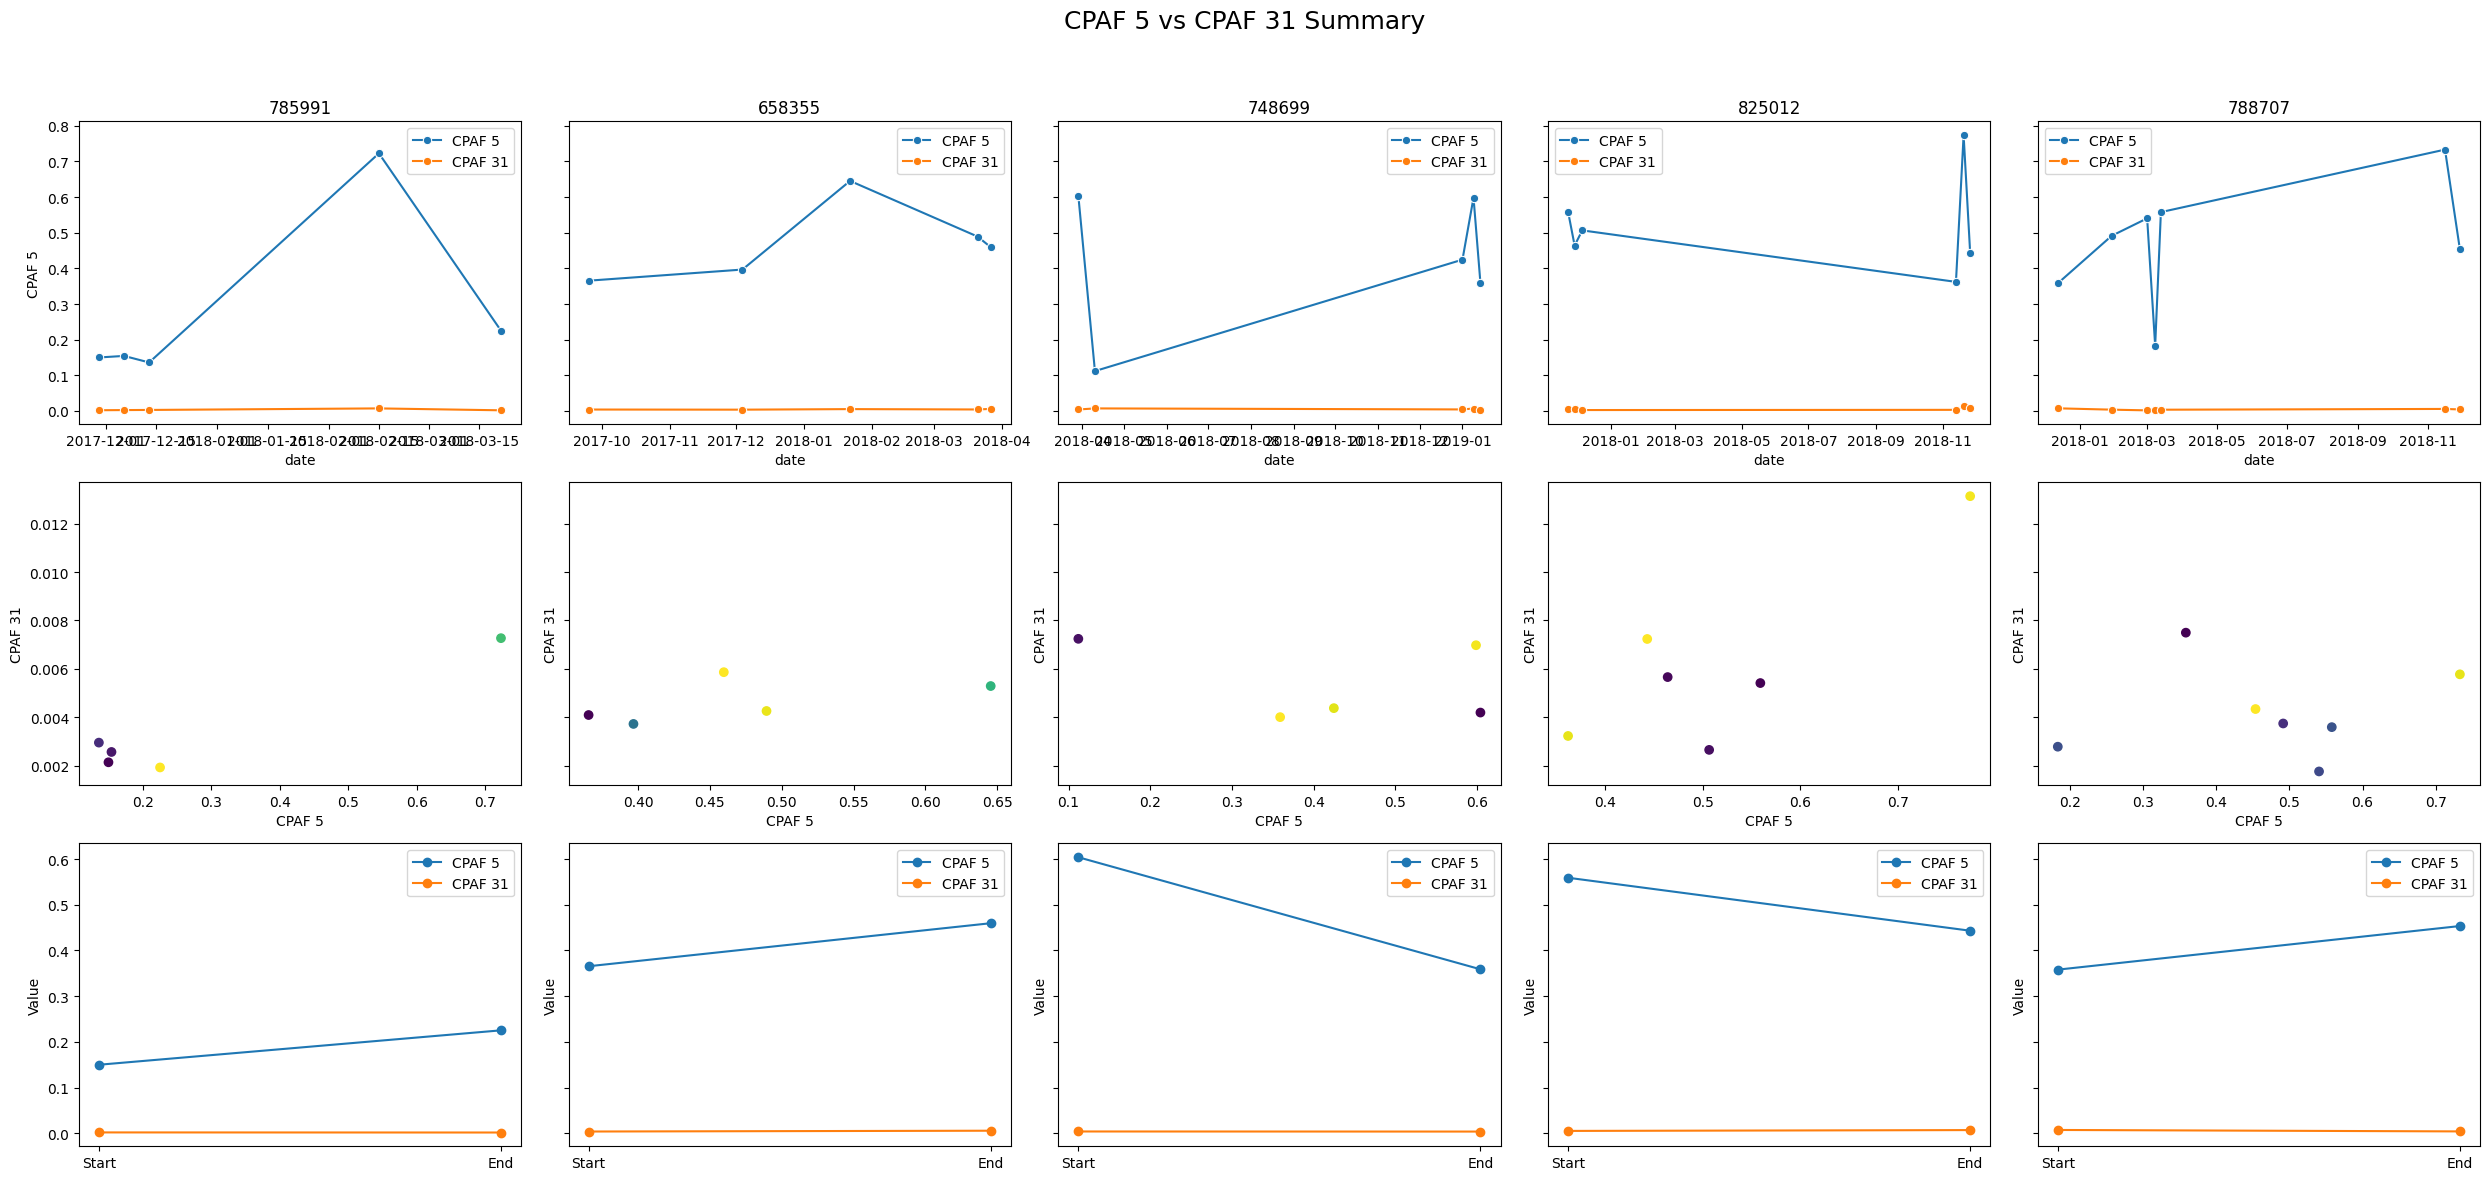

In [26]:
# Set up figure
n_patients = 5
unique_patients = df_sorted.groupby('patient_id').count().sort_values(by='pwCF')[-n_patients:].index

fig, axes = plt.subplots(nrows=3, ncols=n_patients, figsize=(5*n_patients, 12), sharey='row')
fig.suptitle('CPAF 5 vs CPAF 31 Summary', fontsize=18)

for i, pid in enumerate(unique_patients):
    group = df_sorted[df_sorted['patient_id'] == pid].sort_values('date')

    # --- Line plot over time ---
    sns.lineplot(data=group, x='date', y='CPAF 5', label='CPAF 5', marker='o', ax=axes[0, i])
    sns.lineplot(data=group, x='date', y='CPAF 31', label='CPAF 31', marker='o', ax=axes[0, i])
    axes[0, i].set_title(f'{pid}')
    axes[0, i].legend()

    # --- Scatter plot of CPAF 5 vs CPAF 31 colored by date ---
    norm = plt.Normalize(group['date'].min().timestamp(), group['date'].max().timestamp())
    colors = [plt.cm.viridis(norm(d.timestamp())) for d in group['date']]
    axes[1, i].scatter(group['CPAF 5'], group['CPAF 31'], c=colors)
    axes[1, i].set_xlabel('CPAF 5')
    axes[1, i].set_ylabel('CPAF 31')

    # --- Slope plot: first and last values ---
    first = group.iloc[0]
    last = group.iloc[-1]
    axes[2, i].plot(['Start', 'End'], [first['CPAF 5'], last['CPAF 5']], label='CPAF 5', marker='o')
    axes[2, i].plot(['Start', 'End'], [first['CPAF 31'], last['CPAF 31']], label='CPAF 31', marker='o')
    axes[2, i].set_ylabel('Value')
    axes[2, i].legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()